# EDA To Titanic


The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name **DieTanic**.  This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. 

The Objective of this notebook is to give an **idea how is the workflow in any data science problem**. How do we check features, how do we add new features.


## Contents of the Notebook:

#### Part1: Exploratory Data Analysis(EDA):
1) Analysis of the features.

2) Finding any relations or trends considering multiple features.
#### Part2: Feature Engineering and Data Cleaning:
1) Adding any few features.

2) finding outliers

3) Converting features into suitable form for modeling.


## Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('titanic passenger list.csv')

In [3]:
data.shape

(1309, 14)

In [4]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
data.isnull().sum() #checking for total null values

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

The **Age, Cabin and Embarked** have null values. Let's try to fix them.

### How many Survived??

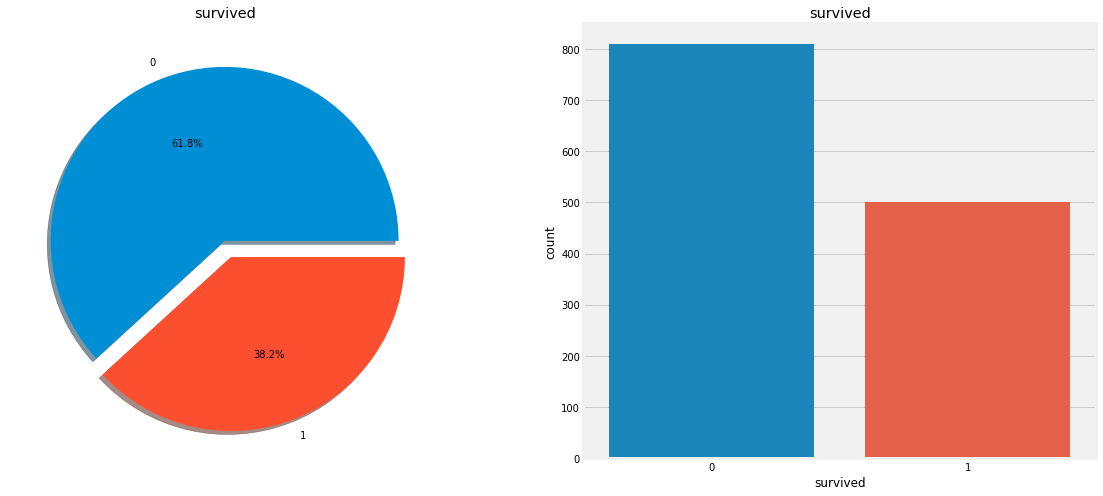

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot(data=data, x="survived", ax=ax[1])
ax[1].set_title('survived')
plt.show()

It is evident that not many passengers survived the accident. 

Out of 1309 passengers only around 500 survived i.e Only **38.2%** of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

## Types Of Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

**Categorical Features in the dataset: Sex,Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset: Age**

## Analysing The Features

## Sex--> Categorical Feature

In [7]:
data.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

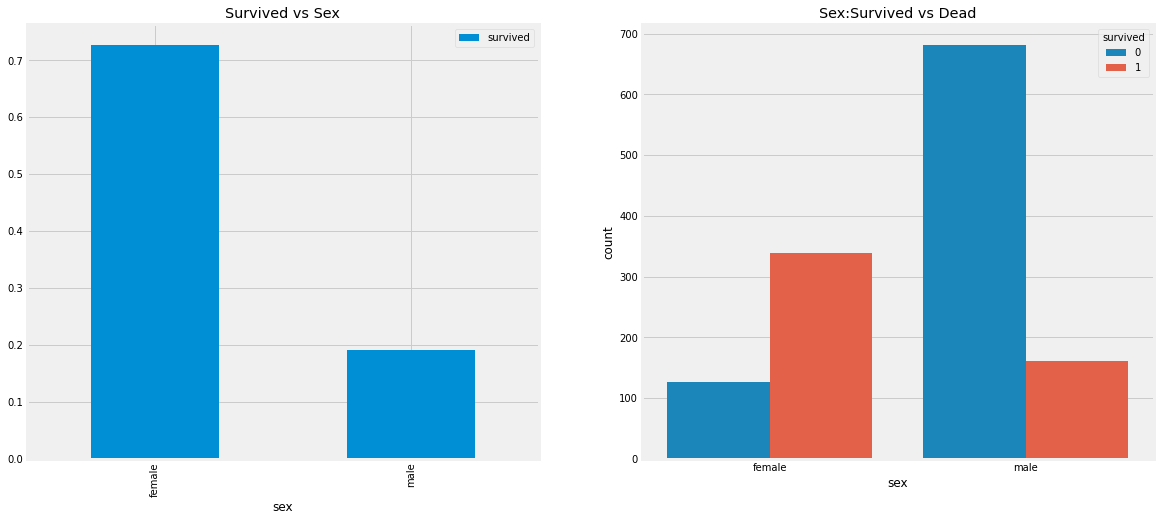

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['sex','survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x= 'sex',hue='survived',data= data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in around 18-19%.**

This looks to be a **very important** feature for modeling. But is it the best??   Lets check other features.

## Pclass --> Ordinal Feature

In [9]:
## pip install --upgrade jinja2\

In [10]:
pd.crosstab(data.pclass,data.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


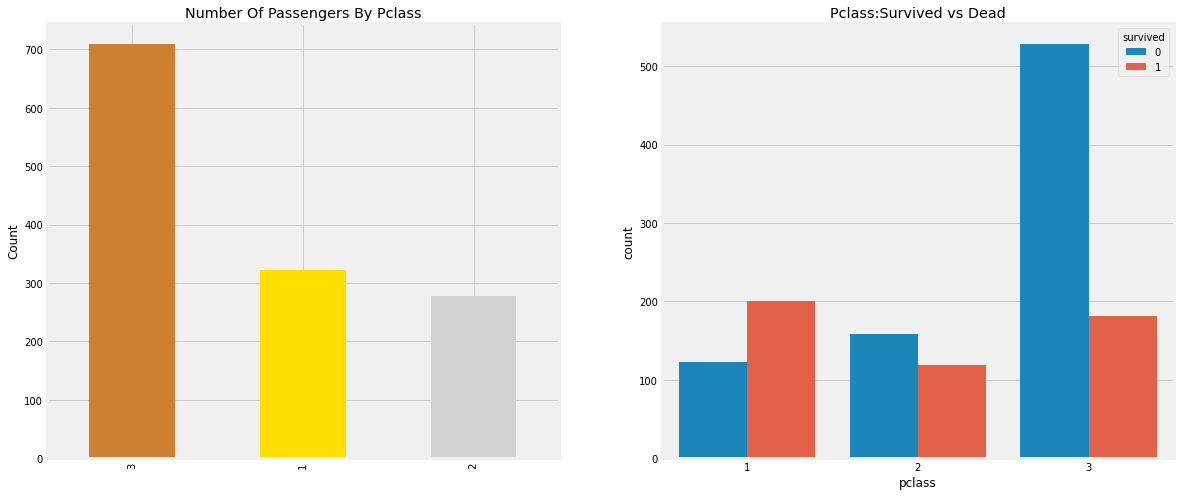

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x= 'pclass',hue='survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass 1 %survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

In [12]:
pd.crosstab([data.sex,data.survived],data.pclass,margins=True).style.background_gradient(cmap='summer_r')


Looking at the **CrossTab** , we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died. 

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

## Age--> Continous Feature


In [13]:
print('Oldest Passenger was of:',data['age'].max(),'Years')
print('Youngest Passenger was of:',data['age'].min(),'Years')
print('Average Age on the ship:',data['age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.17 Years
Average Age on the ship: 29.881137667304014 Years


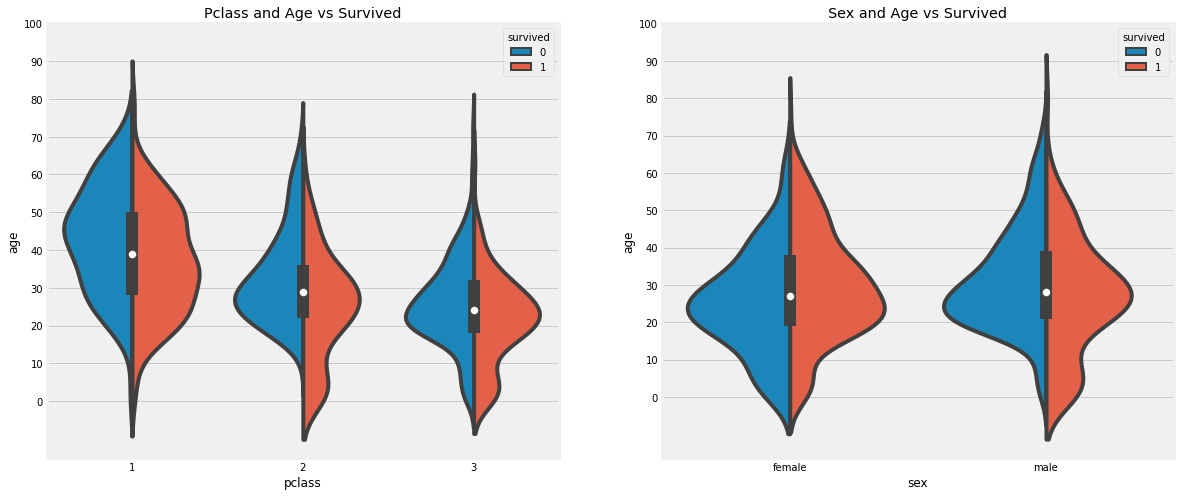

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x= "pclass",y="age", hue="survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="sex",y="age", hue="survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Observations:

1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

**Bingo!!!!**, we can check the **Name**  feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

**''What's In A Name??''**---> **Feature**  

In [15]:
data['initial']=0
for i in data:
    data['initial']=data.name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

Okay so here we are using the Regex: **[A-Za-z]+)\.**. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials from the Name.

In [16]:
pd.crosstab(data.initial,data.sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [17]:
data['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby('initial')['age'].mean() #lets check the average age by Initials

initial
Dona      39.000000
Master     5.482642
Miss      21.834533
Mr        32.545531
Mrs       37.034884
Other     44.923077
Name: age, dtype: float64

### Filling NaN Ages

In [19]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.age.isnull())&(data.initial=='Mr'),'age']=33
data.loc[(data.age.isnull())&(data.initial=='Mrs'),'age']=36
data.loc[(data.age.isnull())&(data.initial=='Master'),'age']=5
data.loc[(data.age.isnull())&(data.initial=='Miss'),'age']=22
data.loc[(data.age.isnull())&(data.initial=='Other'),'age']=46

In [20]:
data.age.isnull().any() #So no null values left finally 

False

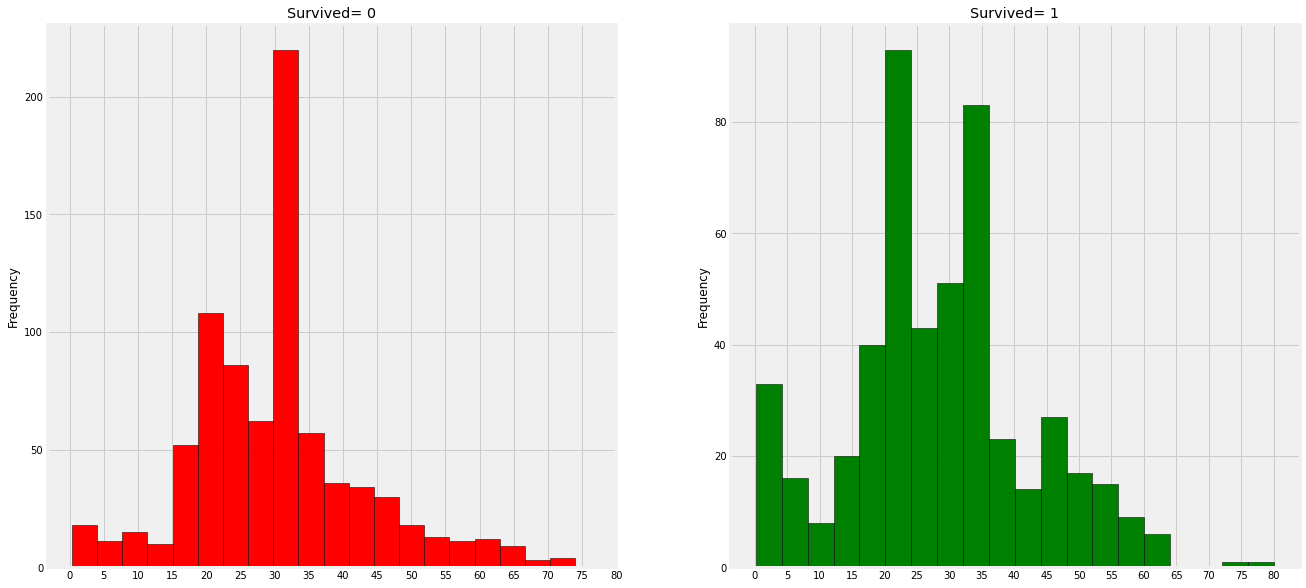

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['survived']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['survived']==1].age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Observations:
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

## SibSip-->Discrete Feature
This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife 

In [22]:
pd.crosstab([data.sibsp],data.survived).style.background_gradient(cmap='summer_r')

survived,0,1
sibsp,,
0,582,309
1,156,163
2,23,19
3,14,6
4,19,3
5,6,0
8,9,0


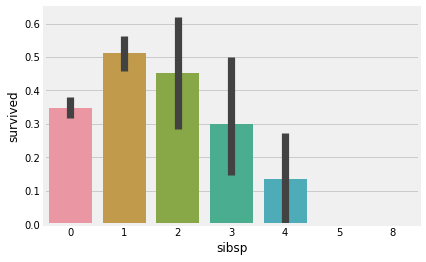

In [23]:
sns.barplot(x='sibsp',y='survived',data=data)
plt.show()

### Observations:


The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is **0%**. The reason may be Pclass??

The reason is **Pclass**. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

In [24]:
pd.crosstab(data.sibsp,data.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
sibsp,,,
0,198,182,511
1,113,82,124
2,8,12,22
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


## Fare--> Continous Feature

In [25]:
print('Highest Fare was:',data['fare'].max())
print('Lowest Fare was:',data['fare'].min())
print('Average Fare was:',data['fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.29547928134557


The lowest fare is **0.0**. Wow!! a free luxorious ride. 

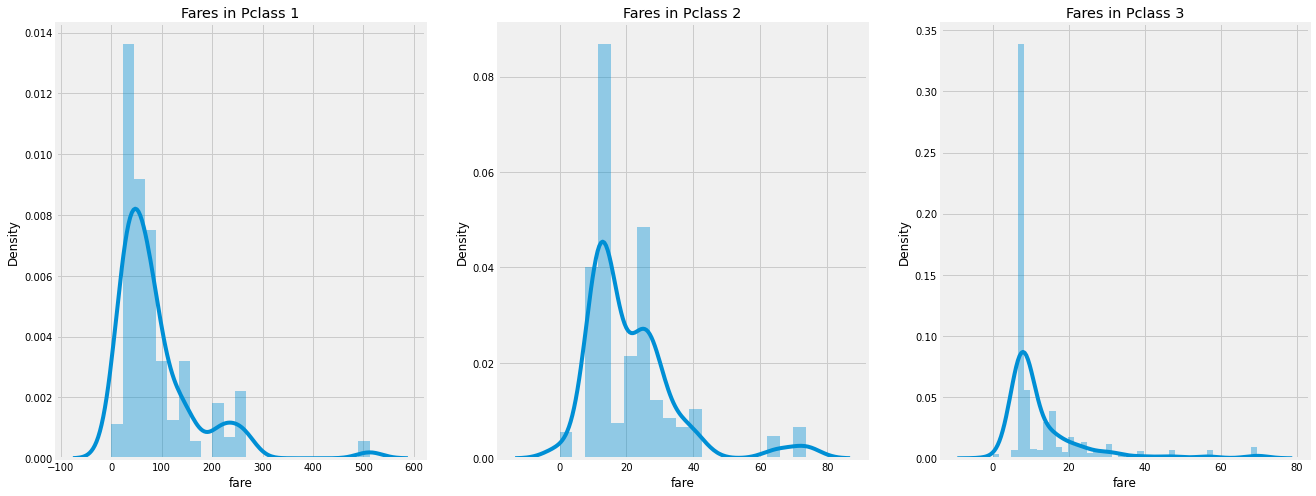

In [26]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['pclass']==1].fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['pclass']==2].fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['pclass']==3].fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

## Observations in a Nutshell for all features:
**Sex:** The chance of survival for women is high as compared to men.

**Pclass:**There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low**. For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2**.   **Money Wins!!!**. 

**Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Parch+SibSp:** Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

## Correlation Between The Features

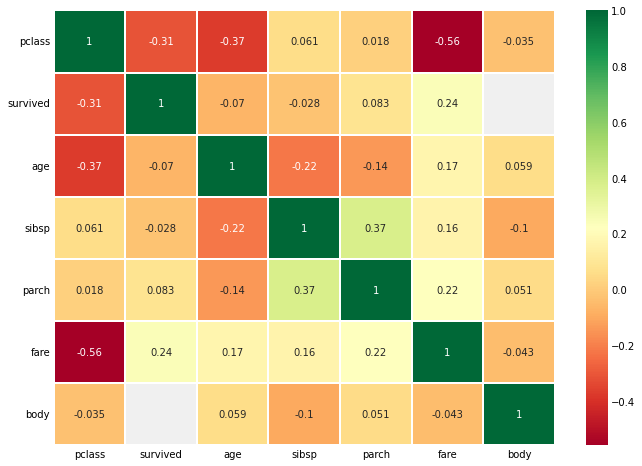

In [27]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp andd Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size.**

### Interpreting The Heatmap

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION:** If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.

**NEGATIVE CORRELATION:** If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

So do you think we should use both of them as **one of them is redundant**. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between **SibSp and Parch i.e 0.41**. So we can carry on with all features.

## Part2: Feature Engineering and Data Cleaning

## Outliers: 

In [28]:
data.describe()
#include='all'

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.969954,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,13.200989,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### We first apply boxplot on the entire data:

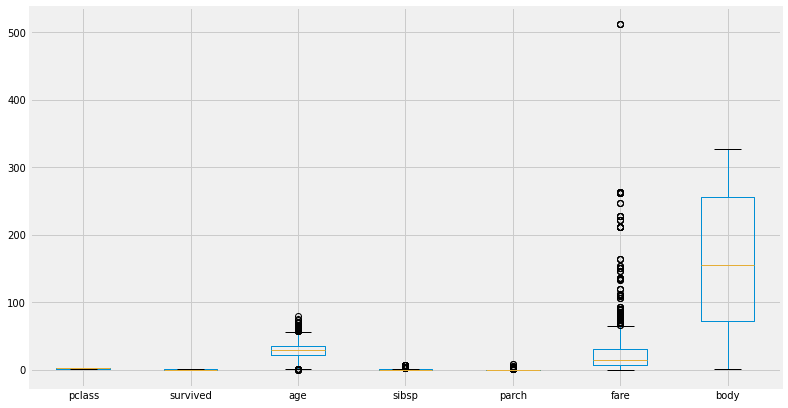

In [29]:
# We can boxplot an entire DataFrame, quick & nasty, ignores non-numeric data too

_, bp = pd.DataFrame.boxplot(data, return_type='both', figsize= (12,7))


In [30]:
bp.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

**whiskers:** the vertical lines extending to the most extreme, non-outlier data points.

**caps:** the horizontal lines at the ends of the whiskers.

**boxes:** the main body of the boxplot showing the quartiles and the median's confidence intervals if enabled.

**medians:** horizontal lines at the median of each box.

**fliers:** points representing data that extend beyond the whiskers (fliers).

**means:** points or lines representing the means.

In [31]:
outliers = [flier.get_ydata() for flier in bp["fliers"]]
# boxes = [box.get_ydata() for box in bp["boxes"]]
# medians = [median.get_ydata() for median in bp["medians"]]
caps = [caps.get_ydata() for caps in bp["caps"]]


# Read more about boxplot components from here https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

In [32]:
outliers[5]

array([211.3375, 151.55, 151.55, 151.55, 151.55, 77.9583, 227.525,
       227.525, 69.3, 78.85, 247.5208, 247.5208, 76.2917, 75.2417,
       227.525, 221.7792, 91.0792, 91.0792, 135.6333, 164.8667, 262.375,
       76.2917, 134.5, 512.3292, 512.3292, 120.0, 120.0, 120.0, 120.0,
       78.85, 78.85, 262.375, 86.5, 136.7792, 136.7792, 151.55, 83.1583,
       83.1583, 83.1583, 71.0, 71.0, 71.2833, 71.2833, 151.55, 81.8583,
       81.8583, 81.8583, 106.425, 247.5208, 106.425, 83.1583, 227.525,
       78.2667, 221.7792, 110.8833, 263.0, 263.0, 263.0, 263.0, 263.0,
       263.0, 133.65, 133.65, 79.2, 79.2, 211.5, 79.2, 89.1042, 89.1042,
       153.4625, 153.4625, 79.2, 76.7292, 76.7292, 83.475, 83.475,
       76.7292, 83.1583, 93.5, 93.5, 77.9583, 90.0, 90.0, 80.0, 211.5,
       211.3375, 106.425, 512.3292, 77.9583, 146.5208, 211.3375, 86.5,
       75.2417, 82.1708, 82.1708, 90.0, 90.0, 90.0, 113.275, 113.275,
       113.275, 108.9, 93.5, 66.6, 66.6, 108.9, 108.9, 93.5, 83.1583,
       135.63

### Boxplots and whiskers

The first thing to notice is that 'fare' has many outliers.

However, plotting all data together might not be right because of the different ranges of attributes. Therefore, we look at one attribute at a time instead. 

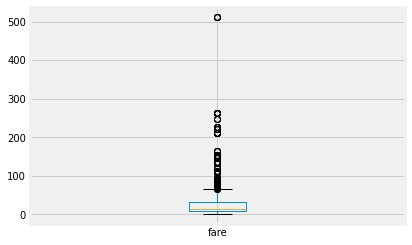

In [33]:
bp = data.boxplot(column='fare')


In [34]:
# We can see a bunch of fares above 200, then something around 500, look at the outliers:
data[data['fare'] > 400] 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA",Mr
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",Mrs
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN,Mr
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN,Miss


### After detecting outliers, let's have a closer look to the origin of these outliers. 

In [35]:
# fare of 512.3292 looks very high compared to other, that's a weird value too, did they split the cost?
# or was it just the one ticket?
512.3292 * 4

2049.3168

In [36]:
# e.g. "There were 4 people who paid the most expensive ticket that cost £512.3292"

# Mrs James Warburton Martinez Cardeza (Charlotte Wardle Drake), 58, from Germantown, PA, 
# boarded the Titanic at Cherbourg with her son Thomas and her maid Anna Ward. 
# They occupied suite B-51/53/55 (ticket number17755, £512, 6s).
    
# http://www.encyclopedia-titanica.org/titanic-survivor/charlotte-cardeza.html

# "with his mother Charlotte Cardeza and his manservant Gustave Lesueur"
    
# Anna: "She worked as personal maid and companion to Mrs Charlotte Cardeza." 

In [37]:
#Let's have a look at their cabin allocationzz
#data[data['cabin'] == 'B101'] 
data[data['cabin'] == 'B51 B53 B55']  # beware, there's a lot of missing cabin data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA",Mr
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",Mrs
51,1,0,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,NaN,NaN,"New York, NY",Mr


Carlsson, Mr. Frans Olof! Who's he? The butler?

"In April 1912 he was first mate on the liner St Louis but because of the coal strike the ship was stuck in Southampton so the company gave him a first class ticket back to New York on Titanic."
http://www.encyclopedia-titanica.org/titanic-victim/frans-olof-carlsson.html



The Titanic's first class passenger list was a "who's who" of the rich and prominent of the upper class in 1912. 

A single person berth in first class cost between £30, the equivalent of £2,653 in 2016, and up to £870 (£76,929) for a parlour suite

Tickets for children cost £3

Third class passengers paid £7

https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic

In [38]:
data[data['fare'] == 7] # only 2 paid £7?

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial
1114,3,0,"Pearce, Mr. Ernest",male,33.0,0,0,343271,7.0,NaN,S,NaN,NaN,NaN,Mr
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S,NaN,NaN,NaN,Mrs


In [39]:
data[data['fare'] ==0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI",Mr
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,33.0,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast",Mr
125,1,0,"Fry, Mr. Richard",male,33.0,0,0,112058,0.0,B102,S,NaN,NaN,NaN,Mr
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,110.0,NaN,Mr
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool,Mr
223,1,0,"Parr, Mr. William Henry Marsh",male,33.0,0,0,112052,0.0,NaN,S,NaN,NaN,Belfast,Mr
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands",Other
363,2,0,"Campbell, Mr. William",male,33.0,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast,Mr
384,2,0,"Cunningham, Mr. Alfred Fleming",male,33.0,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast,Mr
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,33.0,0,0,239854,0.0,NaN,S,NaN,NaN,Belfast,Mr


In [40]:
# "Joseph Bruce Ismay, former chairman of the White Star Line "
# also mates rates, he's the boss, three cabins than you very much
# Roderick was one of the nine-strong "guarantee group" of Harland and Wolff employees chosen to oversee the smooth 
# running of the Titanic's maiden voyage.
# so these are all 'comps'


In [41]:
data[data['cabin']=="B52 B54 B56"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool,Mr


In [42]:
# what are 'LINE'?
data[data['ticket'] == 'LINE'] 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial
896,3,0,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,NaN,NaN,NaN,Mr
898,3,0,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,NaN,NaN,NaN,Mr
963,3,0,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,NaN,NaN,NaN,Mr
1254,3,1,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,15,NaN,NaN,Mr


In [43]:
data[data['fare'] == 3] # nobody paid £3?
# The third class ticket (No.36864) cost £7 14s 10d

# "Tickets for children cost £3"
# https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic
    

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial


In [44]:
data[data['fare'] == 7] # only 2 paid £7?

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial
1114,3,0,"Pearce, Mr. Ernest",male,33.0,0,0,343271,7.0,NaN,S,NaN,NaN,NaN,Mr
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S,NaN,NaN,NaN,Mrs


In [45]:
data[data['fare'] < 10].tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.225,NaN,C,NaN,312.0,NaN,Mr
1302,3,0,"Yousif, Mr. Wazli",male,33.0,0,0,2647,7.225,NaN,C,NaN,NaN,NaN,Mr
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304.0,NaN,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,NaN,C,NaN,NaN,NaN,Mr
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,NaN,NaN,NaN,Mr


In [46]:
# Mr Zimmermann was not married. To reach his destination Saskatoon, Canada, 
# he bought his third class ticket from the agent: Kaiser & Cie., Basel for 390 Swiss francs. 
# (ticket number 315082, £7 17s 6d)
# 


In [47]:
data[data['fare'] > 200].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",Other
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Mrs
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ",Mr
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",Mrs


In [48]:
# They boarded the Titanic at Cherbourg with Colonel Astor's manservant Mr Victor Robbins , 
# Mrs Astor's maid Miss Rosalie Bidois , Miss Caroline Louise Endres Mrs Astor's private nurse and 
# their pet Airedale Kitty. Their ticket was PC 17757 which cost £224 10s 6d. 
# They occupied cabins C-62-64.

In [49]:
data[data['ticket'] == 'PC 17757']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62 C64,C,NaN,124.0,"New York, NY",Other
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C,4,NaN,"New York, NY",Mrs
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,NaN,C,4,NaN,NaN,Miss
103,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C,4,NaN,"New York, NY",Miss
237,1,0,"Robbins, Mr. Victor",male,33.0,0,0,PC 17757,227.525,NaN,C,NaN,NaN,NaN,Mr


### From the above discssions, it is clear that is better to find outliers per class

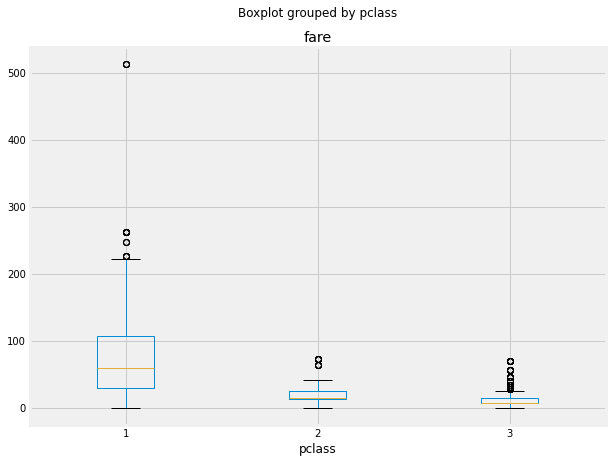

In [51]:
# plot by class
bp = data.boxplot(column='fare', by = 'pclass', figsize= (10,7))

## Q: Investigate the outliers on pclass 2

-----
## New features?

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

## Age_band

#### Problem With Age Feature:
As I have mentioned earlier that **Age is a continous feature**, there is a problem with Continous Variables in Machine Learning Models.

**Eg:**If I say to group or arrange Sports Person by **Sex**, We can easily segregate them by Male and Female.

Now if I say to group them by their **Age**, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these **continous values into categorical values** by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16.
So bins of size 16.

In [53]:
data['Age_band']=0
data.loc[data['age']<=16,'Age_band']=0
data.loc[(data['age']>16)&(data['age']<=32),'Age_band']=1
data.loc[(data['age']>32)&(data['age']<=48),'Age_band']=2
data.loc[(data['age']>48)&(data['age']<=64),'Age_band']=3
data.loc[data['age']>64,'Age_band']=4
data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial,Age_band
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0


In [54]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,575
2,473
0,142
3,106
4,13


True that..the survival rate decreases as the age increases irrespective of the Pclass.

## Family_Size and Alone
At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [55]:
data['Family_Size']=0
data['Family_Size']=data['parch']+data['sibsp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone


**Family_Size=0 means that the passeneger is alone.** Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.


## Fare_Range

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use **pandas.qcut**.

So what **qcut** does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [58]:
data['Fare_Range']=pd.qcut(data['fare'],4)
data.groupby(['Fare_Range'])['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
Fare_Range,
"(-0.001, 7.896]",0.228487
"(7.896, 14.454]",0.284375
"(14.454, 31.275]",0.435976
"(31.275, 512.329]",0.585139


As discussed above, we can clearly see that as the **fare_range increases, the chances of survival increases.**

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in **Age_Band**

In [59]:
data['Fare_cat']=0
data.loc[data['fare']<=7.91,'Fare_cat']=0
data.loc[(data['fare']>7.91)&(data['fare']<=14.454),'Fare_cat']=1
data.loc[(data['fare']>14.454)&(data['fare']<=31),'Fare_cat']=2
data.loc[(data['fare']>31)&(data['fare']<=513),'Fare_cat']=3

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

## Converting String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [60]:
data['sex'].replace(['male','female'],[0,1],inplace=True)
data['embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### reference: 
https://www.kaggle.com/code/zabdallah/eda-to-prediction-dietanic/edit